In [79]:
#import libraries
import pandas as pd
from mplsoccer.pitch import Pitch, VerticalPitch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba
from highlight_text import fig_text
import seaborn as sns
import warnings

#Remove warning
pd.options.mode.chained_assignment = None

#load in csv straight from konklone download
df = pd.read_csv('Footballdata/New/ManUtdvsWolves.csv', encoding='latin-1')

#team selection
team = 'Manchester United'
df1 = df.loc[(df['teamId']==team)]
df1['shirtNo'] = df1['shirtNo'].fillna(0)
df1['shirtNo'] = df1['shirtNo'].astype(int)

#identify the passer and then the recipient, who'll be the playerId of the next action
df1['passer'] = df1['shirtNo']
df1['recipient'] = df1['shirtNo'].shift(-1)

#List of actions that constitue in their positioning 

list1 = ["Pass","BallRecovery","OffsideProvoked", "Save", 'ShotOnPost',
        "Goal","Clearance","Dispossessed","Interception","Foul",
        "MissedShots","SavedShot","Tackle","TakeOn",
        "BlockedPass","Challenge","Claim","KeeperPickup",
        "CrossNotClaimed","CornerAwarded","BallTouch","Aerial"]

#Ensuring the actions are filtered
df2 = df1[df1['type_displayName'].isin(list1)]

#Change the number to integer
pas = pd.to_numeric(df2['passer'],downcast='integer')
rec = pd.to_numeric(df2['recipient'],downcast='integer')

df2['passer'] = pas
df2['recipient'] = rec

In [80]:
#Remove warning
pd.options.mode.chained_assignment = None

#Find Average Locations
average_locs = df2.groupby('passer').agg({'x': ['median'], 'y': ['median']})
average_locs.columns = ['x', 'y']

#Identifying the Subs
Sub = df1.loc[(df1['type_displayName']=="SubstitutionOn")]
Subs = Sub[['shirtNo']]

#Numeric transformation
Num = pd.to_numeric(Subs['shirtNo'],downcast='integer')
Subs['shirtNo'] = Num
Subs.columns = ['Kit']

#Starting 11 Location
average_locs_XI = average_locs[~average_locs.index.isin(Subs.Kit)]
#average_locs_XI.drop([0], inplace=True)

#Subs Location
average_locs_subs = average_locs[average_locs.index.isin(Subs.Kit)]
#average_locs_subs

#Identifying the Subs Off
Suboff = df1.loc[(df1['type_displayName']=="SubstitutionOff")]
Subsoff = Suboff[['shirtNo']]

#Numeric transformation
SuboffNum = pd.to_numeric(Subsoff['shirtNo'],downcast='integer')
Subsoff['shirtNo'] = SuboffNum
Subsoff.columns = ['Kit']

average_locs_subs_off= average_locs[average_locs.index.isin(Subsoff.Kit)]

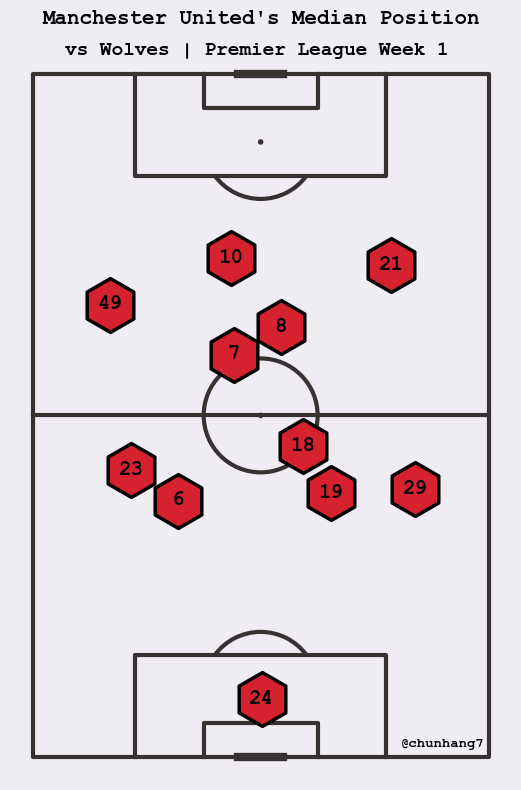

In [81]:
#plot pitch
pitch = VerticalPitch(line_color='#373231', line_zorder=1, pitch_color='#efecf3', spot_scale=0.003, linewidth=3)
fig, ax = pitch.draw(figsize=(8,8))

#Inverse x-axis
plt.gca().invert_xaxis()

#plot nodes
nodes = pitch.scatter(1.2*average_locs_XI.x, 0.8*average_locs_XI.y, s=1500,marker='h',
                           color='#d6222f', edgecolors="black", linewidth=2.5, alpha=1, ax=ax, zorder=3)

for index, row in average_locs_XI.iterrows():
     pitch.annotate(row.name, xy=(1.2*row.x, 0.8*row.y), c='black', va='center', ha='center', 
                    size=15, fontweight='bold', fontfamily="Courier New",ax=ax)

#Set the background color
fig.patch.set_facecolor('#efecf3')

#annotations
ax.set_title(team + "'s Median Position\n", fontsize=15, color="black", fontfamily="Courier New", fontweight='bold', pad=-10)

fig.text(.735,.925,"vs Wolves | Premier League Week 1",fontsize=14,fontfamily='Courier New',ha='right',color='black',fontweight='bold')

#credits
fig.text(.78,.06,'@chunhang7',fontsize=10,fontfamily='Courier New', ha='right',color='black',fontweight='bold')

plt.show()

Text(0, -2, '@chunhang7')

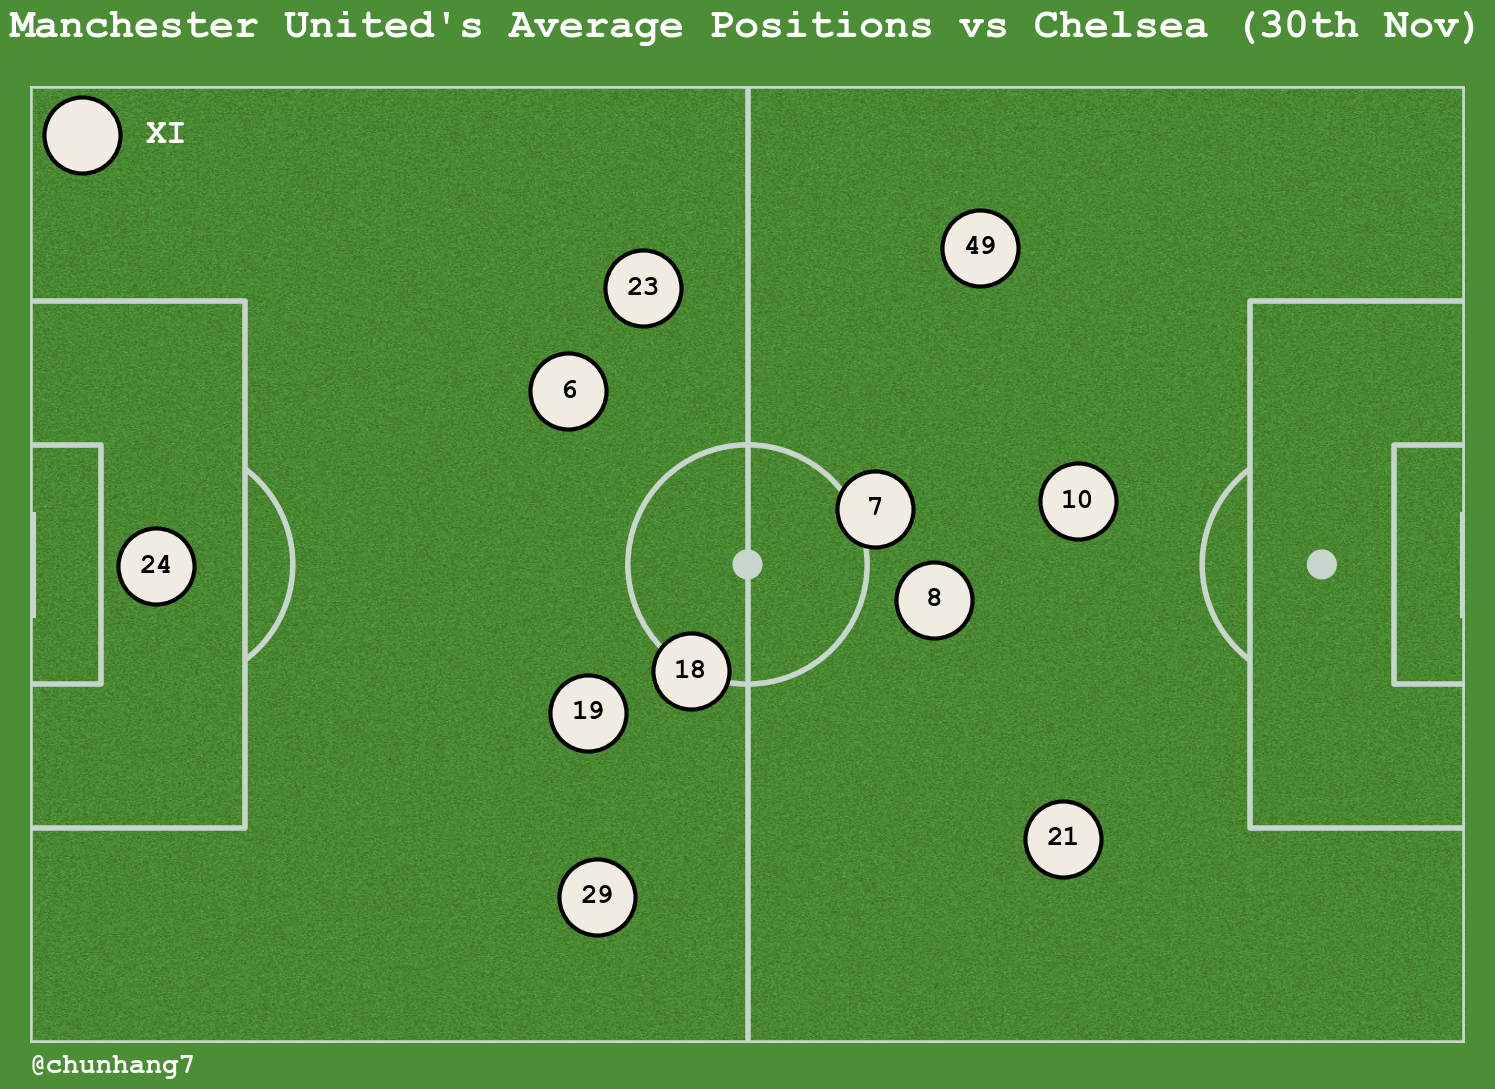

In [31]:
#plot pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', 
              line_color='#c7d5cc', 
              linewidth=4,spot_scale=0.01)

fig, ax = pitch.draw(figsize=(16, 11))

fig.gca().invert_yaxis()


#plot nodes
nodes = pitch.scatter(1.2*average_locs_XI.x, 0.8*average_locs_XI.y, s=3000,
                           color='#f0ece2', edgecolors="#010101", linewidth=3, alpha=1, ax=ax, zorder=2, label = "XI")

"""nodes2 = pitch.scatter(1.2*average_locs_subs.x, 0.8*average_locs_subs.y, s=3000,
                           color='red', edgecolors="#010101", linewidth=3, alpha=1, ax=ax, zorder=2, label = "Sub")

nodes3 = pitch.scatter(1.2*average_locs_subs_off.x, 0.8*average_locs_subs_off.y, s=3000,
                           color='black', edgecolors="#010101", linewidth=3, alpha=0.5, ax=ax, zorder=3)"""

#Uncomment these next two lines to get each node labeled with the player id. Check to see if anything looks off, and make note of each player if you're going to add labeles later like their numbers
for index, row in average_locs_XI.iterrows():
     pitch.annotate(row.name, xy=(1.2*row.x, 0.8*row.y), c='black', va='center', ha='center', 
                    size=20, fontweight='bold', fontfamily="Courier New",ax=ax)

"""for index, row in average_locs_subs.iterrows():
     pitch.annotate(row.name, xy=(1.2*row.x, 0.8*row.y), c='white', va='center', ha='center', 
                    size=20, fontweight='bold', fontfamily="Courier New",ax=ax)
        
for index, row in average_locs_subs_off.iterrows():
     pitch.annotate(row.name, xy=(1.2*row.x, 0.8*row.y), c='white', va='center', ha='center', 
                    size=20, fontweight='bold', fontfamily="Courier New",ax=ax)
"""
#Set the background color
fig.patch.set_facecolor('#4b8e35')


# setup the legend
legend = ax.legend(facecolor='#22312b', handlelength=3, edgecolor='None', 
                   fontsize=20, frameon=False, loc='upper left',
                   labelspacing=2.3, bbox_to_anchor=(-0.01, 0.99))


for text in legend.get_texts():
    text.set_fontfamily("Courier New")
    text.set_fontsize(25)
    text.set_fontweight("bold")
    text.set_color('white')

#annotations
plt.title(team+"'s Average Positions vs Chelsea (30th Nov)\n",color='white',size=30, fontfamily = "Courier New", 
          fontweight = "bold",va='center')

plt.xlim(0,120)
plt.ylim(0,80)

plt.text(0, -2, '@chunhang7', va='center', ha='left', fontsize=20, color='white', 
         fontfamily = "Courier New", fontweight = "bold")